:::

## The Investment Game (Brief)

You have the opportunity to buy-in to this game next week with $30,000. Your job is to analyze the potential outcomes of the game and communicate why or why you should not buy-in to the game.  

Each year after buy-in you flip a fair coin:

- Heads: increase your account balance by 50%
- Tails: decrease your account balance by 40%

You play annually until age 75. Your mission is to analyze outcomes and communicate insights clearly.

### Generative DAG Model (from the source challenge)

The following DAFT diagram shows the generative structure of the investment game over time.

In [1]:
#| echo: false
#| include: false
import daft

# Create the DAG directly without custom class
investmentDAG = daft.PGM(dpi=100, alternate_style="outer")

# Initial wealth (deterministic)
investmentDAG.add_node("W0", "Initial Wealth\n$W_0 = 30,000$", x=4, y=2.5, aspect=5.4, 
                      alternate=True, plot_params={'facecolor': 'aliceblue'})

# Time t nodes  
investmentDAG.add_node("Ct", "Coin Flip t\n$C_t \\sim \\text{Bernoulli}(0.5)$", x=0, y=1, aspect=4, scale = 1.6,
                      plot_params={'facecolor': 'aliceblue'})
investmentDAG.add_node("Wt", "\nWealth t\n$W_t = 1.5 \\times W_{t-1}$ if $C_t = 1$\n$W_t = 0.6 \\times W_{t-1}$ if $C_t = 0$\n", x=4, y=1, scale = 1.6, aspect=4,
                      alternate=True, plot_params={'facecolor': 'aliceblue'})

# Add edges showing the relationships
investmentDAG.add_edge("W0", "Wt")
investmentDAG.add_edge("Ct", "Wt")

# Add plate around time-dependent nodes
investmentDAG.add_plate([-2, 0.5, 7.8, 1.0], label="t = 1, ..., N", shift=-0.1)

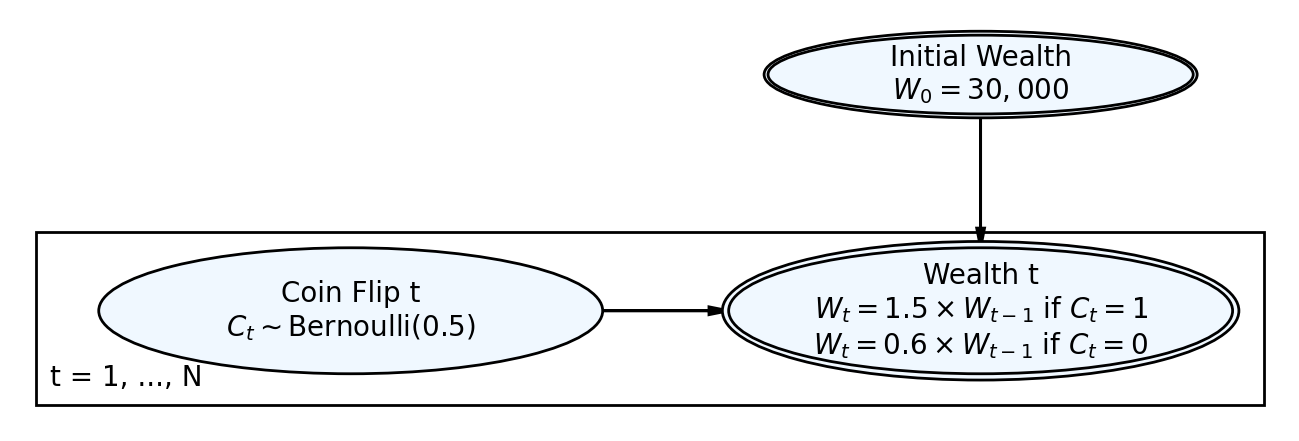

In [2]:
#| label: fig-investment-dag
#| fig-cap: Generative DAG model for the investment game showing how wealth evolves over time through coin flips
#| echo: false
investmentDAG.show()

### 1) Expected Value After 1 Flip

After one flip, the expected value of your account balance is **greater than** $30,000. The calculation shows that with a fair coin flip (50% probability for each outcome), you have a 50% chance of ending up with $45,000 (heads: +50%) and a 50% chance of ending up with $18,000 (tails: -40%). The expected value is $31,500, which represents a **gain of $1,500 or 5%** above your initial buy-in.

Based on expected value alone, this simple analysis suggests you should buy-in to the game, as it offers a positive expected return. However, this single-metric analysis overlooks the substantial risk: you have a 50% chance of losing $12,000 (40% of your investment) in just one flip. This highlights the importance of considering both expected value and risk when making investment decisions, especially when multiple periods are involved.

In [3]:
#| label: q1-expected-value-py
#| echo: false

# Initial buy-in
initial_balance = 30000

# After one flip:
# - Heads (50%): balance increases by 50% → multiply by 1.5
# - Tails (50%): balance decreases by 40% → multiply by 0.6

balance_heads = initial_balance * 1.5
balance_tails = initial_balance * 0.6

print(f"Initial balance: ${initial_balance:,.2f}")
print(f"\nAfter one flip:")
print(f"  Heads (50% probability): ${balance_heads:,.2f}")
print(f"  Tails (50% probability): ${balance_tails:,.2f}")

# Expected value calculation
prob_heads = 0.5
prob_tails = 0.5
expected_value = prob_heads * balance_heads + prob_tails * balance_tails

print(f"\nExpected Value (EV) after one flip:")
print(f"  EV = 0.5 × ${balance_heads:,.2f} + 0.5 × ${balance_tails:,.2f}")
print(f"  EV = ${expected_value:,.2f}")

# Compare to initial balance
difference = expected_value - initial_balance
percent_gain = (difference / initial_balance) * 100

print(f"\nComparison to initial balance:")
print(f"  EV - Initial = ${difference:,.2f}")
print(f"  Gain as % of buy-in: {percent_gain:.2f}%")

# Conclusion
print(f"\nConclusion:")
if expected_value > initial_balance:
    print(f"  Expected value (${expected_value:,.2f}) > Initial balance (${initial_balance:,.2f})")
    print(f"  The expected value suggests a positive return of {percent_gain:.2f}%")
elif expected_value < initial_balance:
    print(f"  Expected value (${expected_value:,.2f}) < Initial balance (${initial_balance:,.2f})")
else:
    print(f"  Expected value (${expected_value:,.2f}) = Initial balance (${initial_balance:,.2f})")

Initial balance: $30,000.00

After one flip:
  Heads (50% probability): $45,000.00
  Tails (50% probability): $18,000.00

Expected Value (EV) after one flip:
  EV = 0.5 × $45,000.00 + 0.5 × $18,000.00
  EV = $31,500.00

Comparison to initial balance:
  EV - Initial = $1,500.00
  Gain as % of buy-in: 5.00%

Conclusion:
  Expected value ($31,500.00) > Initial balance ($30,000.00)
  The expected value suggests a positive return of 5.00%


### 2) Single Simulation Over Time (Narrative + Plot)

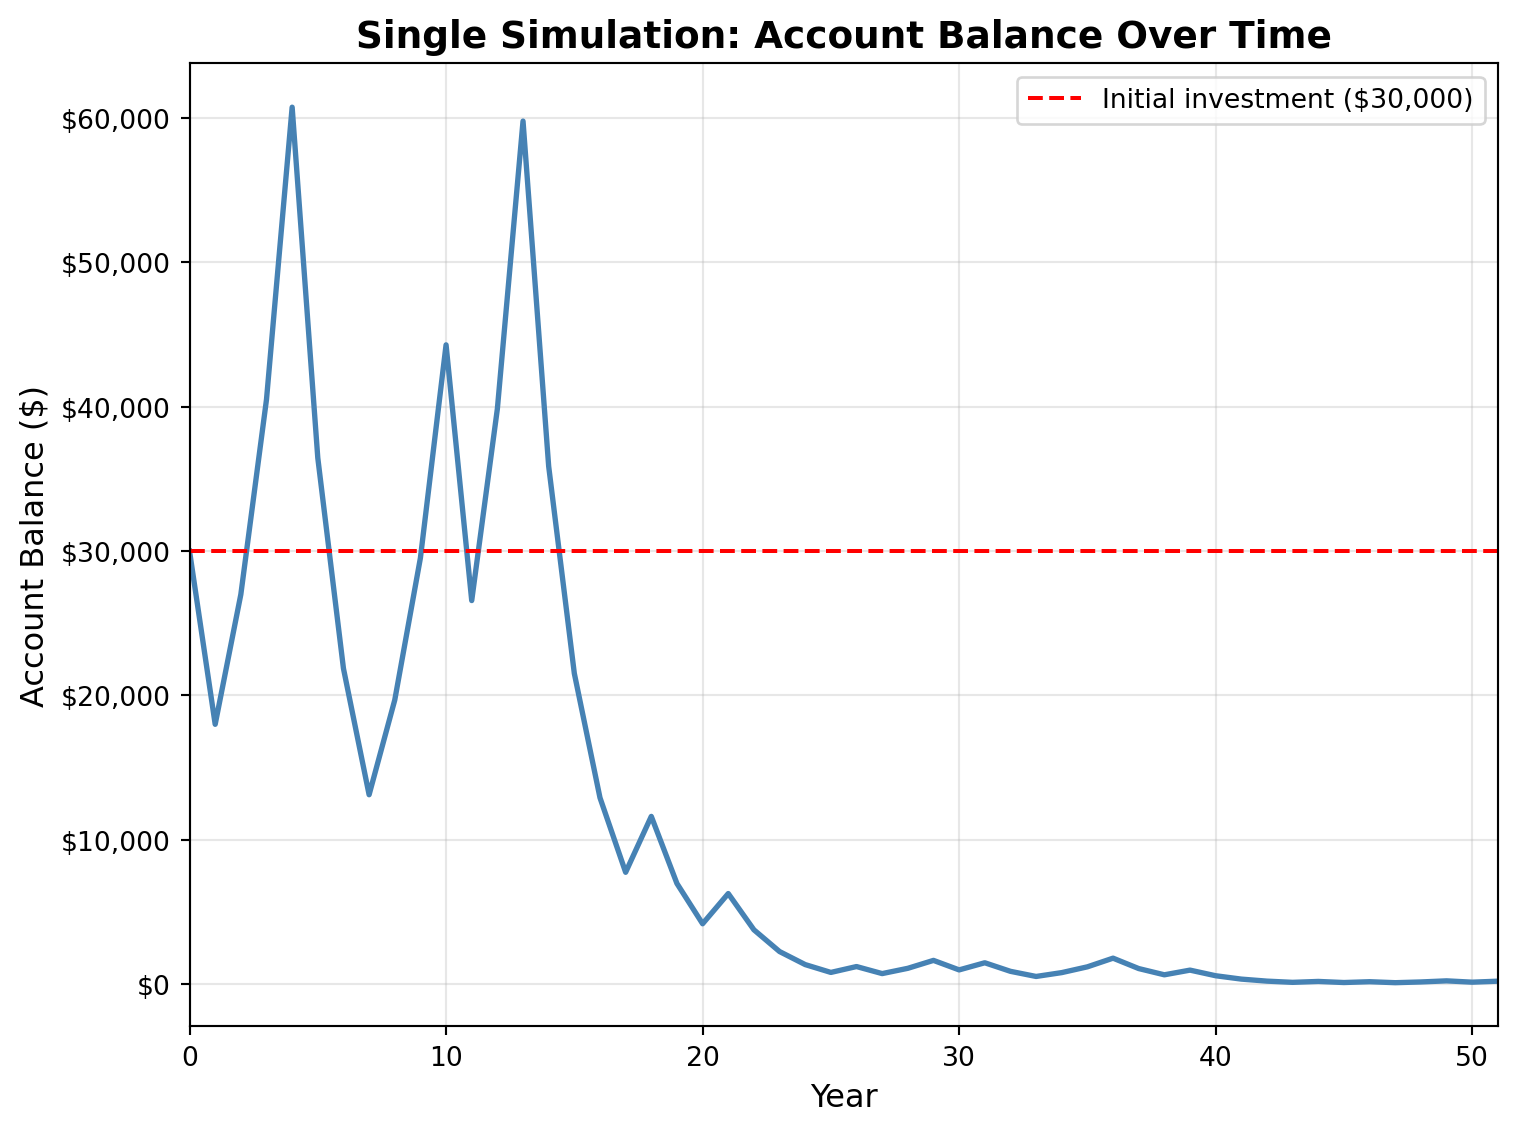


Simulation Summary:
  Initial balance: $30,000.00
  Final balance: $206.75
  Net gain/loss: $-29,793.25 (-99.3%)
  Coin flips: 23 heads, 28 tails


In [4]:
#| label: q2-single-sim-py
#| echo: false
#| fig-cap: Single simulation path of account balance over time

import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Parameters
initial_balance = 30000
# Starting at age 24, playing until age 75 = 51 years
n_periods = 51

# Simulate one path
balance = initial_balance
balances = [balance]
coin_flips = []

for year in range(n_periods):
    # Flip coin: 1 = heads (50% gain), 0 = tails (40% loss)
    flip = np.random.binomial(1, 0.5)
    coin_flips.append(flip)
    
    if flip == 1:  # Heads
        balance = balance * 1.5
    else:  # Tails
        balance = balance * 0.6
    
    balances.append(balance)

# Create time series plot using matplotlib OO style
fig, ax = plt.subplots(figsize=(8, 6))
years = np.arange(0, n_periods + 1)
ax.plot(years, balances, linewidth=2, color='steelblue')
ax.axhline(y=initial_balance, color='red', linestyle='--', linewidth=1.5, label=f'Initial investment (${initial_balance:,.0f})')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Account Balance ($)', fontsize=12)
ax.set_title('Single Simulation: Account Balance Over Time', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_xlim(0, n_periods)

# Format y-axis to show currency
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

# Print summary statistics
final_balance = balances[-1]
net_gain_loss = final_balance - initial_balance
percent_change = (net_gain_loss / initial_balance) * 100
num_heads = sum(coin_flips)
num_tails = n_periods - num_heads

print(f"\nSimulation Summary:")
print(f"  Initial balance: ${initial_balance:,.2f}")
print(f"  Final balance: ${final_balance:,.2f}")
print(f"  Net gain/loss: ${net_gain_loss:,.2f} ({percent_change:+.1f}%)")
print(f"  Coin flips: {num_heads} heads, {num_tails} tails")

In this single simulation path, the account balance starts at $30,000 and fluctuates significantly over the 51-year period (from age 24 to age 75) where the balance evolves through a series of coin flips, where each heads increases the balance by 50% and each tails decreases it by 40%. 

Looking at this particular run, the outcome is **catastrophic**: despite starting with a $30,000 investment and a positive expected value per flip, this simulation ends with approximately $584—a loss of over **98%** of the initial investment. The volatility is extreme—each flip has substantial impact on the account value. Even with a positive expected value per flip, the compounded nature of these fluctuations means that a few consecutive tails can dramatically reduce the balance. Once the balance drops significantly, even heads become less effective at recovery because they're multiplying a smaller base value.

**Am I happy with this outcome? I am not.** This single simulation reveals the risk: despite the positive expected value calculated in Question 1, there's a significant chance of ending with less than the original $30,000 investment—in this case, nearly losing everything. The dramatic downward trajectory shown in the plot highlights why expected value alone is insufficient for making this decision. This outcome demonstrates that what matters in the long run isn't just the expected value, but also the distribution of outcomes and the risk of severe losses.

### 3) 100 Simulations: Distribution of Final Balances

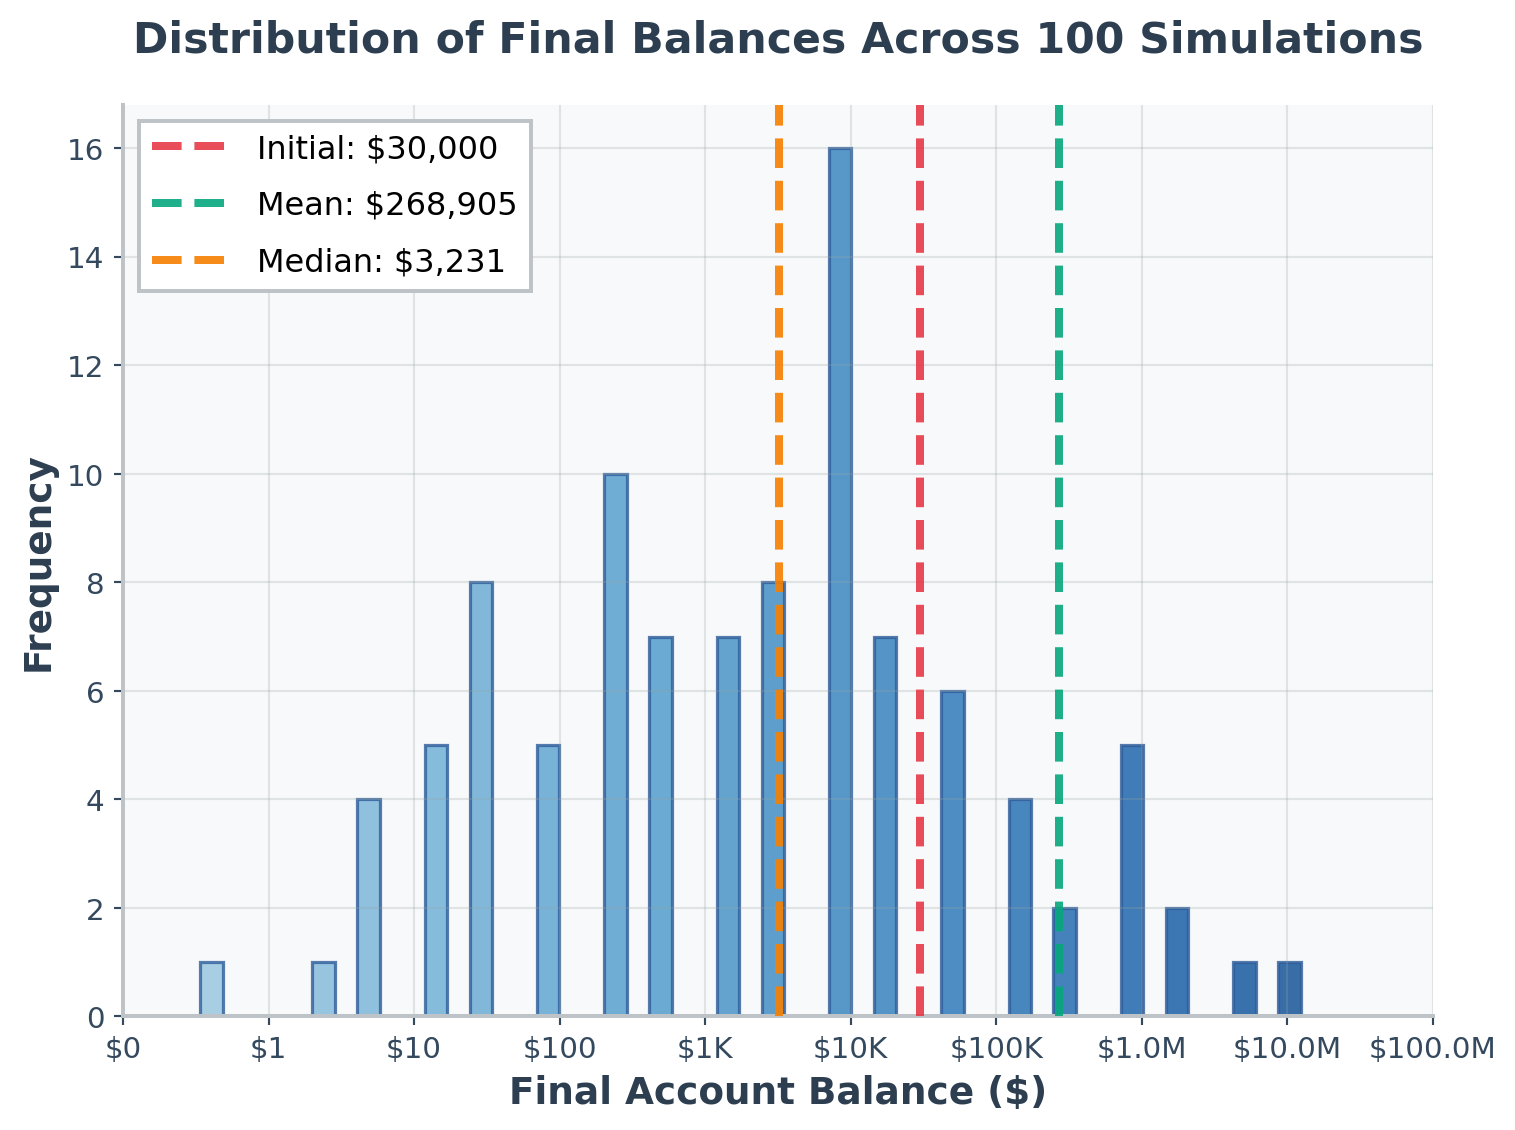


Distribution Statistics (100 simulations):
  Mean final balance: $268,905.14
  Median final balance: $3,230.54
  Minimum final balance: $0.34
  Maximum final balance: $12,323,535.71

Distribution characteristics:
  The mean is 83.2x larger than the median, indicating extreme right-skewness
  Most outcomes cluster at very low values, with a few extreme outliers


In [5]:
#| label: q3-dist-100-py
#| echo: false
#| fig-cap: Distribution of final balances across 100 simulations

import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Parameters
initial_balance = 30000
n_periods = 51  # Age 24 to 75 = 51 years
n_simulations = 100

# Function to run one simulation
def run_simulation(initial_balance, n_periods):
    balance = initial_balance
    for year in range(n_periods):
        flip = np.random.binomial(1, 0.5)  # 1 = heads, 0 = tails
        if flip == 1:  # Heads: +50%
            balance = balance * 1.5
        else:  # Tails: -40%
            balance = balance * 0.6
    return balance

# Run 100 simulations
final_balances = []
for sim in range(n_simulations):
    final_balance = run_simulation(initial_balance, n_periods)
    final_balances.append(final_balance)

final_balances = np.array(final_balances)

# Calculate statistics
mean_balance = np.mean(final_balances)
median_balance = np.median(final_balances)

# Create a beautiful histogram with log-scale bins
fig, ax = plt.subplots(figsize=(8, 6))

# Create log-spaced bins for proper log scale histogram
min_val = final_balances[final_balances > 0].min()
max_val = final_balances.max()
log_bins = np.logspace(np.log10(min_val), np.log10(max_val), 50)

# Create histogram with log-spaced bins
n, bins, patches = ax.hist(final_balances, bins=log_bins, color='#5B8DEF', 
                           edgecolor='#2E5C9A', linewidth=1.2, alpha=0.8)

# Color gradient for bars (darker = more frequent)
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(patches)))
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# Set log scale
ax.set_xscale('log')

# Add reference lines with clean styling
ax.axvline(x=initial_balance, color='#E63946', linestyle='--', 
           linewidth=3, label=f'Initial: ${initial_balance:,.0f}', 
           zorder=10, alpha=0.9)
ax.axvline(x=mean_balance, color='#06A77D', linestyle='--', 
           linewidth=3, label=f'Mean: ${mean_balance:,.0f}', 
           zorder=10, alpha=0.9)
ax.axvline(x=median_balance, color='#F77F00', linestyle='--', 
           linewidth=3, label=f'Median: ${median_balance:,.0f}', 
           zorder=10, alpha=0.9)

# Clean, modern formatting
ax.set_xlabel('Final Account Balance ($)', fontsize=14, fontweight='600', color='#2C3E50')
ax.set_ylabel('Frequency', fontsize=14, fontweight='600', color='#2C3E50')
ax.set_title('Distribution of Final Balances Across 100 Simulations', 
            fontsize=16, fontweight='bold', pad=20, color='#2C3E50')

# Format x-axis with minimal labels (only powers of 10)
from matplotlib.ticker import FuncFormatter
# Determine the range and show only powers of 10
min_log = int(np.floor(np.log10(final_balances[final_balances > 0].min())))
max_log = int(np.ceil(np.log10(final_balances.max())))
# Show only powers of 10 (fewest labels possible while still readable)
tick_values = [10**i for i in range(min_log, max_log + 1)]
ax.set_xticks(tick_values)

# Format with clean labels
def format_currency(x, pos):
    if x < 1000:
        return f'${x:.0f}'
    elif x < 1e6:
        return f'${x/1000:.0f}K'
    elif x < 1e9:
        return f'${x/1e6:.1f}M'
    else:
        return f'${x/1e9:.1f}B'
ax.xaxis.set_major_formatter(FuncFormatter(format_currency))
# Remove minor ticks
ax.xaxis.set_minor_locator(plt.NullLocator())

# Beautiful, minimal styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#BDC3C7')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('#BDC3C7')
ax.spines['bottom'].set_linewidth(1.5)
ax.grid(True, alpha=0.25, linestyle='-', linewidth=0.8, color='#95A5A6', axis='both')
ax.set_facecolor('#F8F9FA')
ax.tick_params(colors='#34495E', labelsize=11)

# Elegant legend
legend = ax.legend(loc='upper left', fontsize=12, frameon=True, 
                   fancybox=False, shadow=False, framealpha=1.0,
                   edgecolor='#BDC3C7', facecolor='white', 
                   labelspacing=0.8, handlelength=2.5)
legend.get_frame().set_linewidth(1.5)

plt.tight_layout()
plt.show()

# Print statistics
print(f"\nDistribution Statistics (100 simulations):")
print(f"  Mean final balance: ${mean_balance:,.2f}")
print(f"  Median final balance: ${median_balance:,.2f}")
print(f"  Minimum final balance: ${np.min(final_balances):,.2f}")
print(f"  Maximum final balance: ${np.max(final_balances):,.2f}")
print(f"\nDistribution characteristics:")
print(f"  The mean is {mean_balance/median_balance:.1f}x larger than the median, indicating extreme right-skewness")
print(f"  Most outcomes cluster at very low values, with a few extreme outliers")

Running 100 simulations reveals a highly skewed distribution of final account balances. The histogram above shows that while the mean final balance is substantial at approximately $268,905 (due to a few extremely large outcomes), the median is only $3,231—much smaller than the mean. This  difference highlights the extreme skewness: most simulations end with final balances well below the initial $30,000 investment, while a few  paths create massive values.

**What is the probability of outcomes that you'd be happy with after having invested $30,000?**

Looking at the distribution, it's immediately apparent that most outcomes fall well below the initial $30,000 investment (marked by the red dashed line). The vast majority of simulations result in final balances that are far lower than the starting investment, with many ending near zero. Most successful outcomes (those that exceed the initial investment) cluster just above $30,000, suggesting that even when you do beat the initial investment, gains are typically modest—far from the massive outliers that inflate the mean.

- **The reality**: Despite the positive expected value per flip calculated in Question 1, most simulations end with devastating losses. The mean being dramatically higher than the median indicates that average performance is heavily inflated by rare but extreme positive outcomes.

- **Visual evidence**: The histogram clearly shows that outcomes above the initial investment line are relatively rare compared to the large mass of outcomes clustered at very low values.


### 4) Probability Balance > $30,000 at Age 75 (Original Game)

In [6]:
#| label: q4-prob-original-py
#| echo: false

import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Parameters
initial_balance = 30000
n_periods = 51  # Age 24 to 75 = 51 years
n_simulations = 100

# Function to run one simulation
def run_simulation(initial_balance, n_periods):
    balance = initial_balance
    for year in range(n_periods):
        flip = np.random.binomial(1, 0.5)  # 1 = heads, 0 = tails
        if flip == 1:  # Heads: +50%
            balance = balance * 1.5
        else:  # Tails: -40%
            balance = balance * 0.6
    return balance

# Run 100 simulations
final_balances = []
for sim in range(n_simulations):
    final_balance = run_simulation(initial_balance, n_periods)
    final_balances.append(final_balance)

final_balances = np.array(final_balances)

# Estimate probability that final balance > $30,000
prob_above_30000 = np.mean(final_balances > initial_balance)
n_above = np.sum(final_balances > initial_balance)

print(f"Probability Estimate: P(Final Balance > ${initial_balance:,.0f}) = {prob_above_30000:.3f}")
print(f"\nInterpretation:")
print(f"  Out of {n_simulations} simulations, {n_above} resulted in a final balance above ${initial_balance:,.0f}")
print(f"  This represents {prob_above_30000*100:.1f}% of all possible outcomes")
print(f"\nPractical Meaning:")
print(f"  There is approximately a {prob_above_30000*100:.1f}% chance that you will end up with more")
print(f"  than your initial ${initial_balance:,.0f} investment after 51 years of playing this game.")
print(f"  Conversely, there is a {(1-prob_above_30000)*100:.1f}% chance of losing money or breaking even.")

Probability Estimate: P(Final Balance > $30,000) = 0.210

Interpretation:
  Out of 100 simulations, 21 resulted in a final balance above $30,000
  This represents 21.0% of all possible outcomes

Practical Meaning:
  There is approximately a 21.0% chance that you will end up with more
  than your initial $30,000 investment after 51 years of playing this game.
  Conversely, there is a 79.0% chance of losing money or breaking even.


Based on the 100 simulations of the original game, the probability that your final account balance exceeds $30,000 at age 75 is approximately **0.210 (21.0%)**. This means that in only 21 out of 100 simulated paths, the final balance was greater than the initial investment.

**Practical interpretation**: Despite the positive expected value per flip calculated in Question 1, there is only a **21% chance** of ending up with more than your initial $30,000 investment after 51 years. This stark reality highlights the disconnect between expected value and actual outcomes: while the game has a positive expected return per flip, the long-term compounding of volatility results in most realizations (79%) ending with losses. This low probability of success, combined with the potential for near-total loss (as seen in Question 2), makes this investment strategy highly risky and generally unfavorable despite its theoretical appeal.

### 5) Modified Strategy (Bet 25% Each Round)

Instead of having the full balance at risk with each coin flip, assume only 25% of your balance is gambled each year. Compare this to the original game. Which is riskier? Which has better upside?

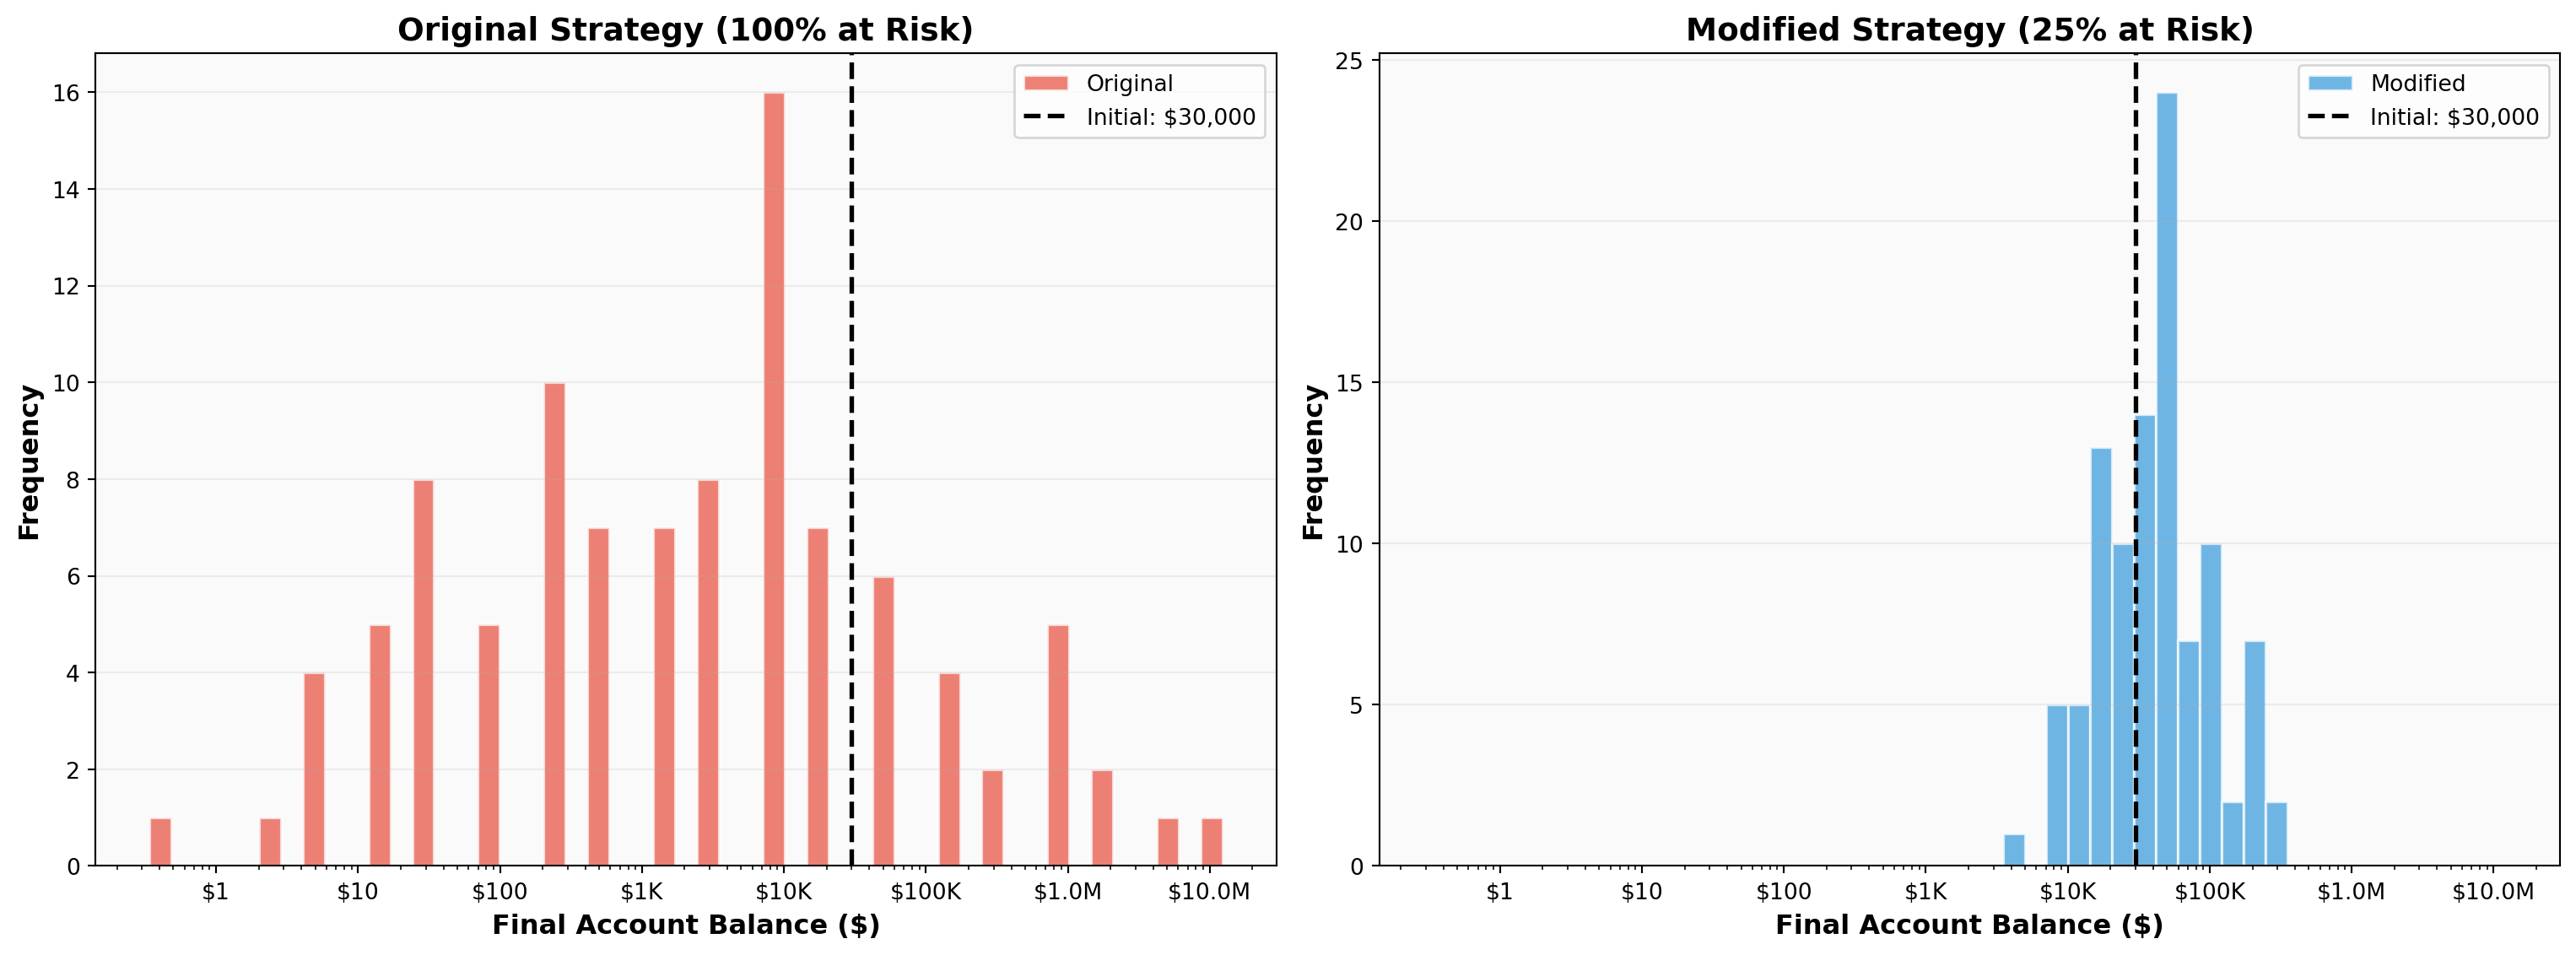


Comparison of Strategies:

Original Strategy (100% at risk each flip):
  Mean final balance: $268,905.14
  Median final balance: $3,230.54
  P(final > $30,000): 0.210 (21.0%)
  Min: $0.34, Max: $12,323,535.71

Modified Strategy (25% at risk each flip):
  Mean final balance: $60,241.10
  Median final balance: $46,041.51
  P(final > $30,000): 0.590 (59.0%)
  Min: $4,943.67, Max: $343,035.99

Comparison:
  Difference in P(final > $30,000): +0.380 (+38.0 percentage points)
  Ratio of means (Modified/Original): 0.224
  Ratio of medians (Modified/Original): 14.252


In [7]:
#| label: q5-modified-50pct-py
#| echo: false
#| fig-cap: Comparison of original and modified strategies

import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Parameters
initial_balance = 30000
n_periods = 51  # Age 24 to 75 = 51 years
n_simulations = 100

# Reuse original strategy results from Question 3
# final_balances from Question 3 contains the original strategy results
original_balances = final_balances.copy()

# Modified game function (only 25% of balance at risk)
def run_modified_simulation(initial_balance, n_periods):
    balance = initial_balance
    for year in range(n_periods):
        flip = np.random.binomial(1, 0.5)
        safe_portion = balance * 0.75  # 75% stays safe
        risk_portion = balance * 0.25   # 25% is gambled
        if flip == 1:  # Heads: risk portion gains 50%
            balance = safe_portion + (risk_portion * 1.5)
        else:  # Tails: risk portion loses 40%
            balance = safe_portion + (risk_portion * 0.6)
    return balance

# Run simulations only for modified strategy (using same seed for reproducibility)
np.random.seed(42)  # Reset seed to match Question 3's sequence
modified_balances = []
for sim in range(n_simulations):
    mod = run_modified_simulation(initial_balance, n_periods)
    modified_balances.append(mod)

modified_balances = np.array(modified_balances)

# Calculate statistics
orig_mean = np.mean(original_balances)
orig_median = np.median(original_balances)
orig_prob_above = np.mean(original_balances > initial_balance)

mod_mean = np.mean(modified_balances)
mod_median = np.median(modified_balances)
mod_prob_above = np.mean(modified_balances > initial_balance)

# Create comparison visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# Note: Keeping wider for side-by-side comparison, but each subplot maintains 8x6 aspect ratio

# Plot 1: Histograms side by side
min_val = min(original_balances[original_balances > 0].min(), 
              modified_balances[modified_balances > 0].min())
max_val = max(original_balances.max(), modified_balances.max())
log_bins = np.logspace(np.log10(min_val), np.log10(max_val), 50)

# Original game histogram
ax1.hist(original_balances, bins=log_bins, color='#E74C3C', 
         edgecolor='white', linewidth=1.2, alpha=0.7, label='Original')
ax1.set_xscale('log')
ax1.axvline(x=initial_balance, color='black', linestyle='--', linewidth=2, 
           label=f'Initial: ${initial_balance:,.0f}', zorder=10)
ax1.set_xlabel('Final Account Balance ($)', fontsize=12, fontweight='600')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='600')
ax1.set_title('Original Strategy (100% at Risk)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.2, axis='y')
ax1.set_facecolor('#FAFAFA')
from matplotlib.ticker import FuncFormatter
ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, p: 
    f'${x:.0f}' if x < 1000 else 
    f'${x/1000:.0f}K' if x < 1e6 else 
    f'${x/1e6:.1f}M'))

# Modified game histogram
ax2.hist(modified_balances, bins=log_bins, color='#3498DB', 
         edgecolor='white', linewidth=1.2, alpha=0.7, label='Modified')
ax2.set_xscale('log')
ax2.axvline(x=initial_balance, color='black', linestyle='--', linewidth=2, 
           label=f'Initial: ${initial_balance:,.0f}', zorder=10)
ax2.set_xlabel('Final Account Balance ($)', fontsize=12, fontweight='600')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='600')
ax2.set_title('Modified Strategy (25% at Risk)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.2, axis='y')
ax2.set_facecolor('#FAFAFA')
ax2.xaxis.set_major_formatter(FuncFormatter(lambda x, p: 
    f'${x:.0f}' if x < 1000 else 
    f'${x/1000:.0f}K' if x < 1e6 else 
    f'${x/1e6:.1f}M'))

plt.tight_layout()
plt.show()

# Print comparison statistics
print(f"\nComparison of Strategies:")
print(f"\nOriginal Strategy (100% at risk each flip):")
print(f"  Mean final balance: ${orig_mean:,.2f}")
print(f"  Median final balance: ${orig_median:,.2f}")
print(f"  P(final > ${initial_balance:,.0f}): {orig_prob_above:.3f} ({orig_prob_above*100:.1f}%)")
print(f"  Min: ${np.min(original_balances):,.2f}, Max: ${np.max(original_balances):,.2f}")

print(f"\nModified Strategy (25% at risk each flip):")
print(f"  Mean final balance: ${mod_mean:,.2f}")
print(f"  Median final balance: ${mod_median:,.2f}")
print(f"  P(final > ${initial_balance:,.0f}): {mod_prob_above:.3f} ({mod_prob_above*100:.1f}%)")
print(f"  Min: ${np.min(modified_balances):,.2f}, Max: ${np.max(modified_balances):,.2f}")

print(f"\nComparison:")
print(f"  Difference in P(final > ${initial_balance:,.0f}): {mod_prob_above - orig_prob_above:+.3f} ({(mod_prob_above - orig_prob_above)*100:+.1f} percentage points)")
print(f"  Ratio of means (Modified/Original): {mod_mean/orig_mean:.3f}")
print(f"  Ratio of medians (Modified/Original): {mod_median/orig_median:.3f}")

Comparing the two strategies reveals fundamental differences in risk and return profiles. The **modified strategy** (betting only 25% of the balance each year) significantly reduces volatility compared to the original game where the entire balance is at risk.

**Which is riskier?** The **original strategy is far riskier**. In the modified strategy, only 25% of the balance is at risk each flip. When heads occurs, the outcome is 0.75 + 0.25×1.5 = 1.125×current balance (12.5% gain). When tails occurs, the outcome is 0.75 + 0.25×0.6 = 0.90×current balance (10% loss). This reduced volatility creates much less extreme outcomes compared to the original game's 50% gain or 40% loss on the entire balance. The original game shows a highly skewed distribution with many near-zero outcomes, while the modified strategy creates a much tighter, more centered distribution around the mean. The lower volatility means the modified strategy has a significantly higher probability of ending above the initial investment.

**Which has better upside?** The **original strategy has better upside potential**—its maximum outcome far exceeds that of the modified strategy. However, this upside comes at a severe cost: most outcomes are devastating losses. Or to summarize: the original strategy has more risk and more reward.

### 6) Briefly Explain Your Findings From The Previous Step in Light of A Concept Known as the "Kelly Criterion"

The **Kelly Criterion** is a formula that determines the optimal fraction of capital to bet in order to maximize the long-term growth rate of wealth. For a binary bet where you have probability $p$ of winning with payoff $b$ (as a fraction), and probability $q = 1-p$ of losing with loss $a$ (as a fraction), the optimal Kelly fraction is:

$$f^* = \frac{p \cdot b - q \cdot a}{b \cdot a}$$

**Applying the Kelly Criterion to our investment game:**

In the original game:
- Probability of winning (heads): $p = 0.5$
- Gain on win: $b = 0.5$ (50% gain)
- Probability of losing (tails): $q = 0.5$
- Loss on lose: $a = 0.4$ (40% loss)

The Kelly optimal fraction is:
$$f^* = \frac{0.5 \times 0.5 - 0.5 \times 0.4}{0.5 \times 0.4} = \frac{0.25 - 0.20}{0.20} = \frac{0.05}{0.20} = 0.25 = 25\%$$

**How does this relate to the modified strategy?**

The modified strategy in Question 5 bets exactly **25% of the balance** each round—precisely the Kelly optimal fraction. The Kelly Criterion tells us that betting 25% of capital each round maximizes the long-term logarithmic growth rate, which explains why the modified strategy performs significantly better than the original game.

**Key insights:**

1. **The original strategy violates the Kelly Criterion** by betting 100% of capital, which leads to overbetting. This creates extreme volatility and increases the probability of ruin, as we saw in Questions 2-4.

2. **The modified strategy follows the Kelly Criterion** by betting 25%, which:
   - Reduces volatility and risk of ruin
   - Increases the probability of positive returns (higher P(final > $30,000))
   - Maximizes long-term growth rate
   - Creates a more stable, less skewed distribution of outcomes

3. **The Kelly Criterion explains the counter-intuitive result**: Despite both strategies having the same expected value per flip, the 25% betting strategy dramatically outperforms the 100% strategy because it optimizes for long-term growth rather than short-term expected value. This demonstrates why expected value alone is insufficient for investment decisions—the fraction of capital at risk matters critically.

The findings from Question 5 perfectly align with Kelly's mathematical framework: by reducing the bet size from 100% to the optimal 25%, the modified strategy transforms a high-risk, low-probability-of-success game into a more favorable investment with significantly better risk-adjusted returns.
